<a href="https://colab.research.google.com/github/yoramabbou770/AICourseRoad2/blob/main/squareDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

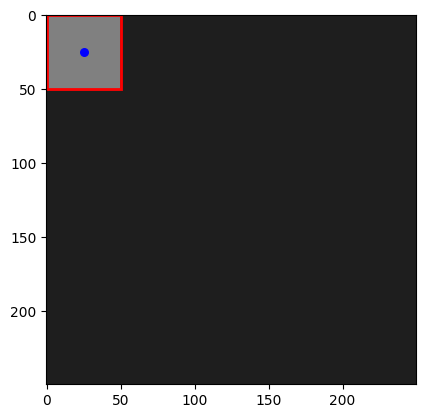

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a dark matrix
matrix_size = 250
matrix = np.zeros((matrix_size, matrix_size, 3), dtype=np.uint8)
dark_color = (30, 30, 30)  # Dark color (RGB values)

matrix[:, :] = dark_color

# Function to update and display the matrix with the moving grey square and algorithmic square
def update(frame):
    plt.clf()  # Clear the previous plot

    # Size of the animated grey square
    grey_square_size = 50

    # Calculate the position of the animated grey square for the current frame
    diagonal_movement = int((frame / total_frames) * (matrix_size - grey_square_size))

    # Draw the entire dark matrix
    plt.imshow(matrix)

    # Draw the animated grey square at the new position
    plt.fill_between(
        range(diagonal_movement, diagonal_movement + grey_square_size),
        diagonal_movement,
        diagonal_movement + grey_square_size,
        color='gray'  # Animated square color (grey)
    )

    # Draw the algorithmic square with only red borders that follows the animated grey square
    red_square_size = 50
    algorithmic_square_x = diagonal_movement
    algorithmic_square_y = diagonal_movement
    algorithmic_square = Rectangle(
        (algorithmic_square_x, algorithmic_square_y),
        red_square_size,
        red_square_size,
        edgecolor='red',  # Border color of the algorithmic square
        facecolor='none',  # No filling inside the algorithmic square
        linewidth=2
    )

    plt.gca().add_patch(algorithmic_square)

    # Calculate the center of the grey square
    center_x = algorithmic_square_x + grey_square_size / 2
    center_y = algorithmic_square_y + grey_square_size / 2

    # Draw a blue point at the center of the grey square
    plt.scatter(center_x, center_y, c='blue', s=30, marker='o')

# Animation duration in seconds
animation_duration = 10

# Number of frames per second
fps = 30

# Total number of frames
total_frames = animation_duration * fps

# Calculate the interval to achieve the desired duration
interval = 1000 / fps

# Create the animation
animation = FuncAnimation(plt.gcf(), update, frames=total_frames, interval=interval, repeat=False)

# Display the animation in the notebook
HTML(animation.to_jshtml())